<b> PHYS 4060 Lab 3 <b>
    <br>
WIENER-KHINCHIN THEOREM AND POWER SPECTRAL DENSITY 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import periodogram

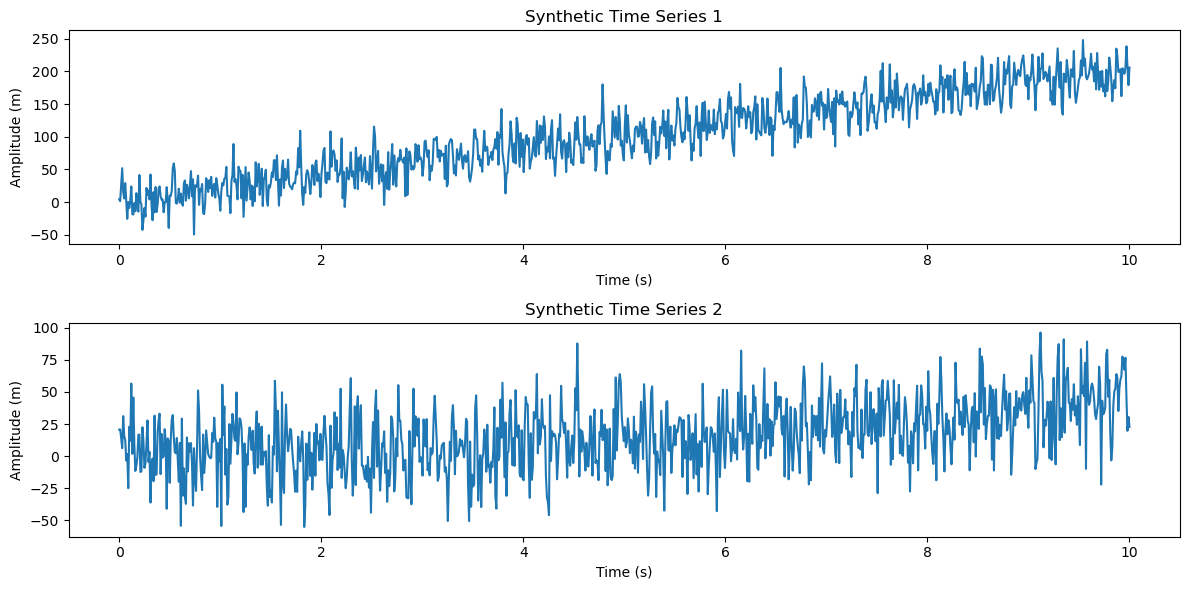

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Define parameters
n_points = 1000  # Number of data points
t = np.linspace(0, 10, n_points)  # Time vector

# Generate the first synthetic time series
series1 = np.zeros(n_points)
num_sin = 5  # Number of sinusoids

# Lists to store individual sinusoids and their frequencies
sinusoids1 = []
frequencies1 = [1, 2, 5, 8, 12]  # Specific frequencies
amplitudes1 = [1, 2.5, 5.7, 8.6, 12.5]
phases1 = [np.pi/4, np.pi/2, np.pi, 0, -np.pi/3]

for i in range(num_sin):
    freq = frequencies1[i]  # Use the specific frequencies
    amplitude = amplitudes1[i]  # Amplitude
    phase = phases1[i]  # Phase
    sinusoid = amplitude * np.sin(2 * np.pi * freq * t + phase)
    sinusoids1.append(sinusoid)
    series1 += sinusoid

# Add linear trend
slope = 20
intercept = 2
linear_trend = slope * t + intercept
series1 += linear_trend

# Add random noise
noise_level = 20
noise = np.random.normal(0, noise_level, n_points)
series1 += noise

# Generate the second synthetic time series with similar characteristics
series2 = np.zeros(n_points)
sinusoids2 = []

for i in range(num_sin):
    freq = frequencies1[i]  # Use the specific frequencies
    amplitude = amplitudes1[i] #amplitude = np.random.uniform(1, 10)  # Amplitude
    phase = phases1[i]  # Phase
    sinusoid = amplitude * np.sin(2 * np.pi * freq * t + phase)
    sinusoids2.append(sinusoid)
    series2 += sinusoid

# Add quadratic trend
quadratic_trend = 0.5 * t**2 - 0.5 * t + 0.3
series2 += quadratic_trend

# Add random noise
noise2 = np.random.normal(0, noise_level, n_points)
series2 += noise2

# Create a figure with two rows and one column of subplots
plt.figure(figsize=(12, 6))

# Subplot for Synthetic Time Series 1
plt.subplot(2, 1, 1)
plt.title('Synthetic Time Series 1')
plt.plot(t, series1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

# Subplot for Synthetic Time Series 2
plt.subplot(2, 1, 2)
plt.title('Synthetic Time Series 2')
plt.plot(t, series2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

plt.tight_layout()

In [3]:
# Plotting the Autocovariance function for Series 1

# Calculate Auto-Covariance Function
def autocovariance(series, lag):
    n = len(series)
    autocovar_sum = 0
    mean_series = np.mean(series)
    for t in range(n - lag):
        autocovar_sum += (series[t] - mean_series) * (series[t + lag] - mean_series)
    return autocovar_sum / n
def FourierTransform(autocovariance):
    sampling_frequency = 1 / (t[1] - t[0])
    power_spectrum = np.fft.fft(autocovariance)
    fft_freqs = np.fft.fftfreq(len(power_spectrum), 1/sampling_frequency)
    return power_spectrum, fft_freqs, sampling_frequency

def SeriesTransforms(series, points, lag_i, lag_f, autocov_title, power_spectrum_title, psd_title):
    autocov_list = []
    lag = np.linspace(lag_i, lag_f, (lag_f - lag_i))
    for i in lag:
        autocov_series = autocovariance(series, int(i))
        autocov_list.append(autocov_series)
    power_spectrum, fft_freqs, sampling_frequency = FourierTransform(autocov_list)
    power_spectrum = np.real(power_spectrum)
    psd = []
    for i in range(len(power_spectrum)):
        if fft_freqs[i] != 0:
            psd.append((np.abs(power_spectrum[i])**2) / (fft_freqs[i]))
        else:
            # Handle the case when fft_freqs[i] is 0 (DC component)
            psd.append(np.abs(power_spectrum[i])**2)

     
   # Select positive frequencies
    positive_freqs_mask = fft_freqs >= 0
    fft_freqs = fft_freqs[positive_freqs_mask]
    psd = np.array(psd)[positive_freqs_mask]
    power_spectrum = power_spectrum[positive_freqs_mask]
    
    # Create a figure with two rows and one column of subplots
    plt.figure(figsize=(12, 4))
    plt.title(autocov_title)
    plt.plot(lag, autocov_list, label='Autocovariance')
    plt.xlabel('Lag')
    plt.ylabel('Autocovariance')
    plt.grid(True)
    plt.legend
    plt.show()
    
    # plot for Synthetic Power Spectrum
    plt.figure(figsize=(12, 4))
    plt.title(power_spectrum_title)
    plt.plot(fft_freqs, power_spectrum, label='Power Spectrum')
    plt.xlabel('Freqeuncy [Hz]')
    plt.ylabel('Power Spectrum (m$^2$)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.title(psd_title)
    plt.semilogy(fft_freqs, psd, label='Power Spectral Density')
    plt.xlabel('Freqeuncy [Hz]')
    plt.ylabel('Power Spectral Density (m$^2$/Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return

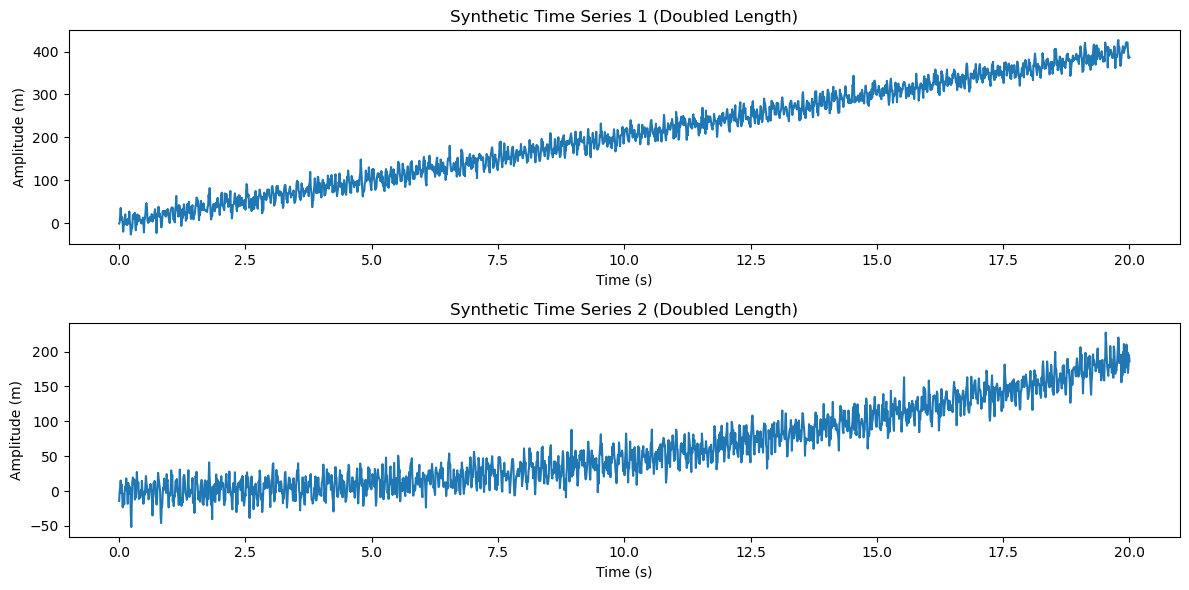

In [4]:
# Set seed for reproducibility
np.random.seed(42)

# Define parameters for the doubled length
n_points_doubled = 2000  # Double the number of data points
t_doubled = np.linspace(0, 20, n_points_doubled)  # Double the time vector

# Generate the first synthetic time series with doubled length
series1_doubled = np.zeros(n_points_doubled)
num_sin = 5  # Number of sinusoids

# Lists to store individual sinusoids and their frequencies
sinusoids1_doubled = []
frequencies1_doubled = [1, 2, 5, 8, 12]  # Specific frequencies
amplitudes1_doubled = [1, 2, 5, 8, 12]
phases1_doubled = [np.pi/4, np.pi/2, np.pi, 0, -np.pi/3]
for i in range(num_sin):
    freq = frequencies1_doubled[i]  # Use the specific frequencies
    amplitude = amplitudes1_doubled[i] #amplitude = np.random.uniform(1, 10)  # Amplitude
    phase = phases1_doubled[i]  # Phase
    sinusoid = amplitude * np.sin(2 * np.pi * freq * t_doubled + phase)
    sinusoids1_doubled.append(sinusoid)
    series1_doubled += sinusoid

# Add linear trend
slope = 20
intercept = 2
linear_trend_doubled = slope * t_doubled + intercept
series1_doubled += linear_trend_doubled

# Add random noise
noise_level = 10
noise_doubled = np.random.normal(0, noise_level, n_points_doubled)
series1_doubled += noise_doubled

# Generate the second synthetic time series with doubled length
series2_doubled = np.zeros(n_points_doubled)
sinusoids2_doubled = []

for i in range(num_sin):
    freq = frequencies1_doubled[i]  # Use the specific frequencies
    amplitude = amplitudes1_doubled[i]  # Amplitude
    phase = phases1_doubled[i]  # Phase
    sinusoid = amplitude * np.sin(2 * np.pi * freq * t_doubled + phase)
    sinusoids2_doubled.append(sinusoid)
    series2_doubled += sinusoid

# Add quadratic trend
quadratic_trend_doubled = 0.5 * t_doubled**2 - 0.5 * t_doubled + 0.3
series2_doubled += quadratic_trend_doubled

# Add random noise
noise2_doubled = np.random.normal(0, noise_level, n_points_doubled)
series2_doubled += noise2_doubled

# Create a figure with two rows and one column of subplots
plt.figure(figsize=(12, 6))

# Subplot for Synthetic Time Series 1 (Doubled Length)
plt.subplot(2, 1, 1)
plt.title('Synthetic Time Series 1 (Doubled Length)')
plt.plot(t_doubled, series1_doubled)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

# Subplot for Synthetic Time Series 2 (Doubled Length)
plt.subplot(2, 1, 2)
plt.title('Synthetic Time Series 2 (Doubled Length)')
plt.plot(t_doubled, series2_doubled)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

plt.tight_layout()

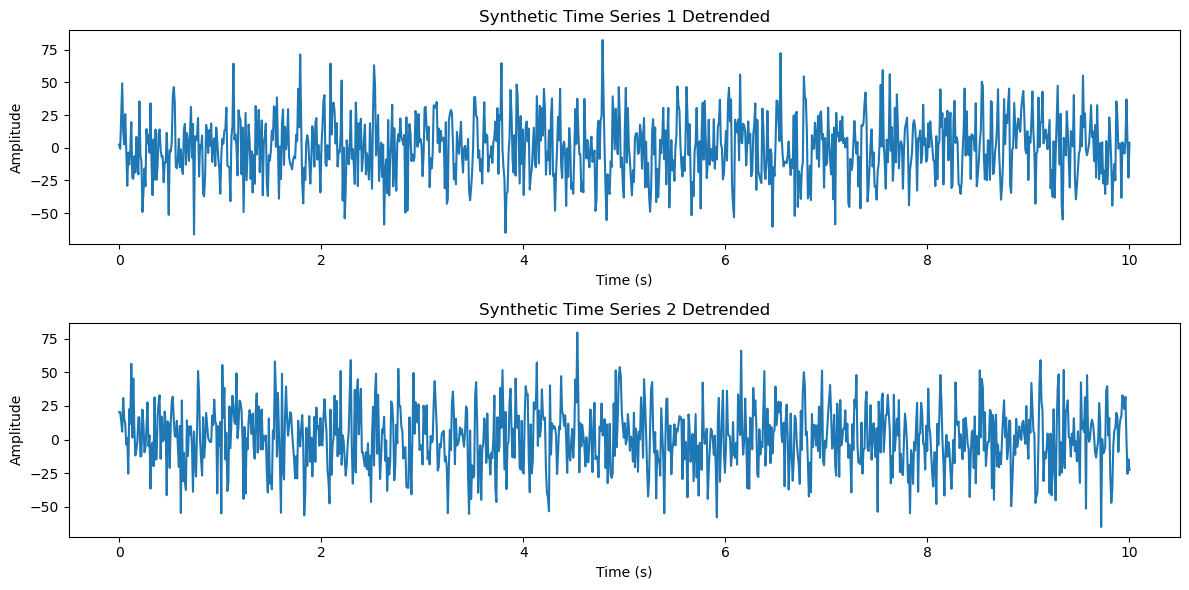

In [5]:
# Detrended Series
series1_detrended = series1 - linear_trend 
series2_detrended = series2 - quadratic_trend

# Plot the synthetic time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Synthetic Time Series 1 Detrended')
plt.plot(t, series1_detrended)
plt.xlabel('Time (s)')  # Add x-axis label
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.title('Synthetic Time Series 2 Detrended')
plt.plot(t, series2_detrended)
plt.xlabel('Time (s)')  # Add x-axis label
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

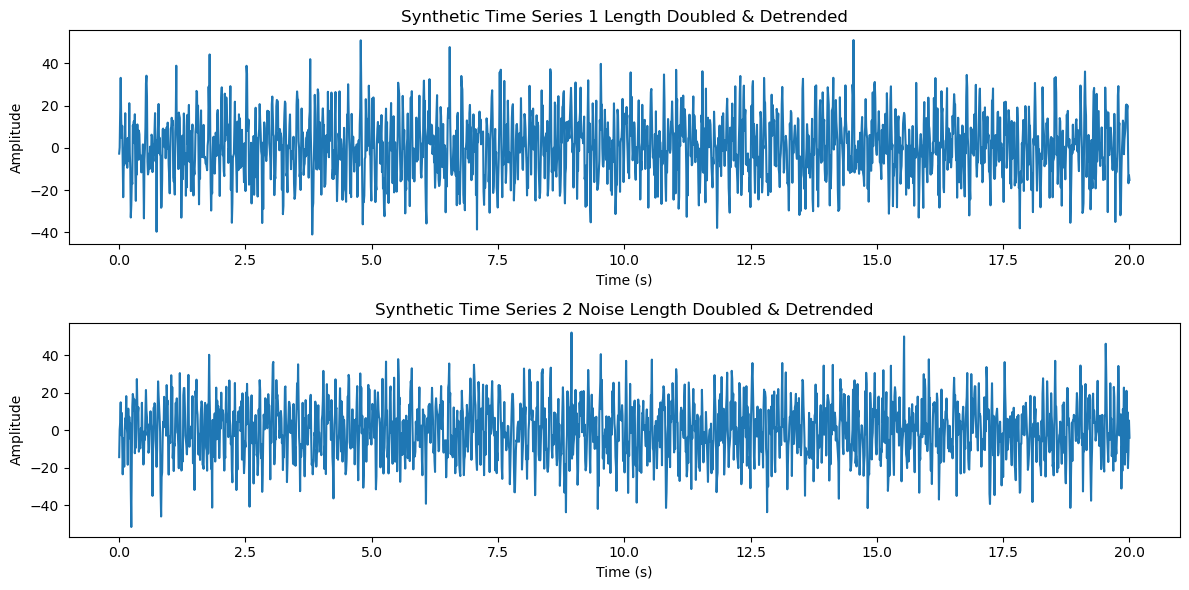

In [6]:
# Doubled Series Detrended
series1_doubled_detrended = series1_doubled - linear_trend_doubled
series2_doubled_detrended = series2_doubled - quadratic_trend_doubled

# Plot the synthetic time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Synthetic Time Series 1 Length Doubled & Detrended')
plt.plot(t_doubled, series1_doubled_detrended)
plt.xlabel('Time (s)')  # Add x-axis label
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.title('Synthetic Time Series 2 Noise Length Doubled & Detrended')
plt.plot(t_doubled, series2_doubled_detrended)
plt.xlabel('Time (s)')  # Add x-axis label
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

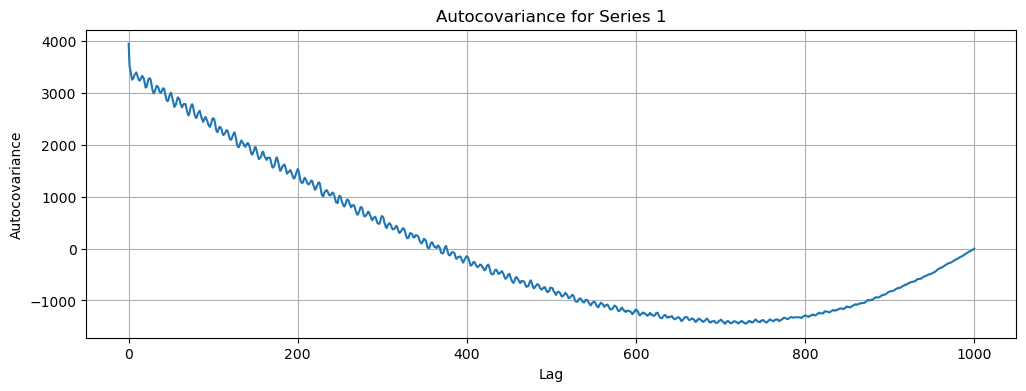

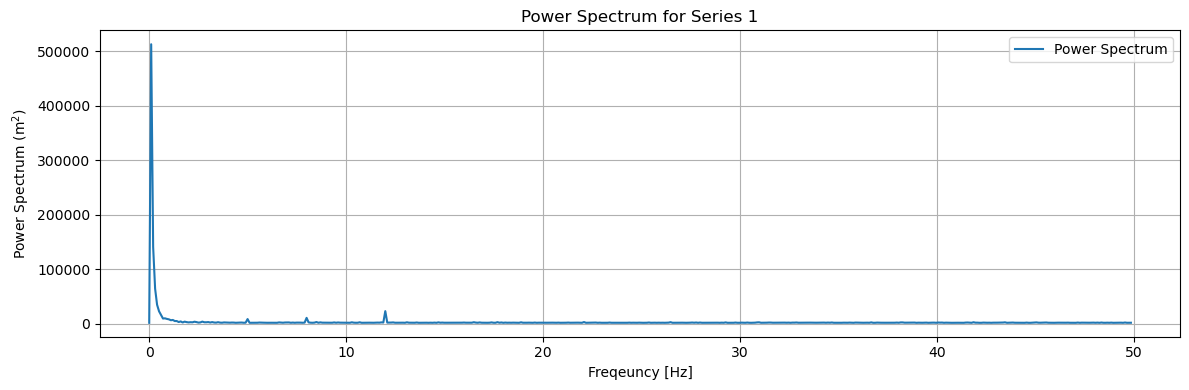

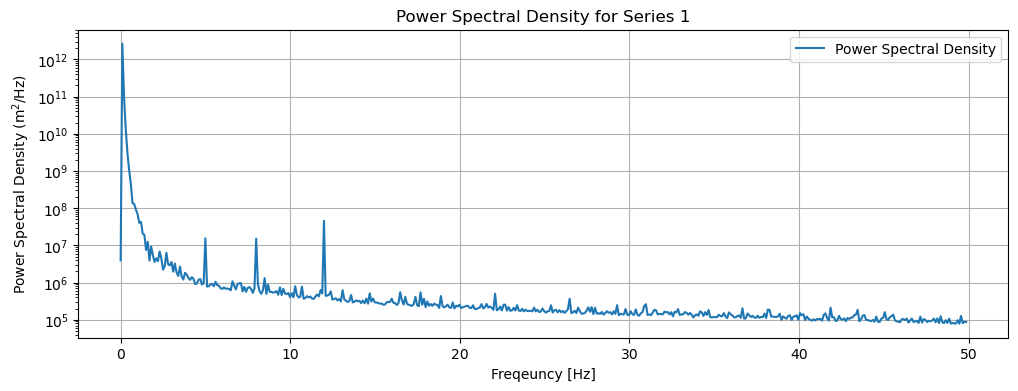

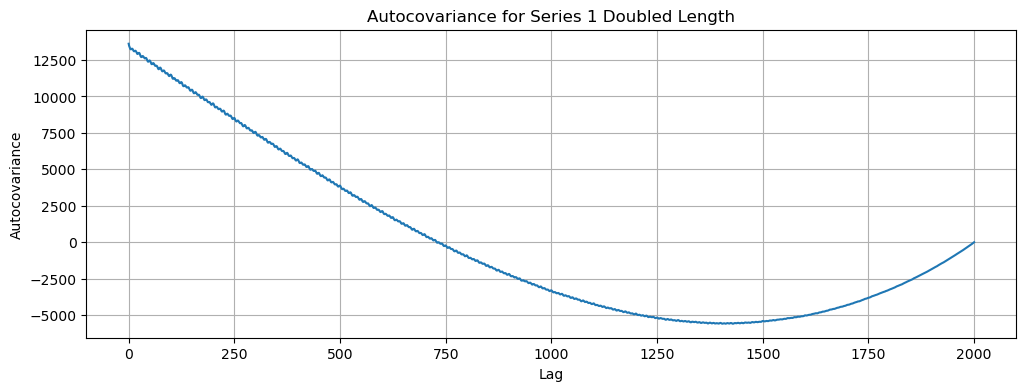

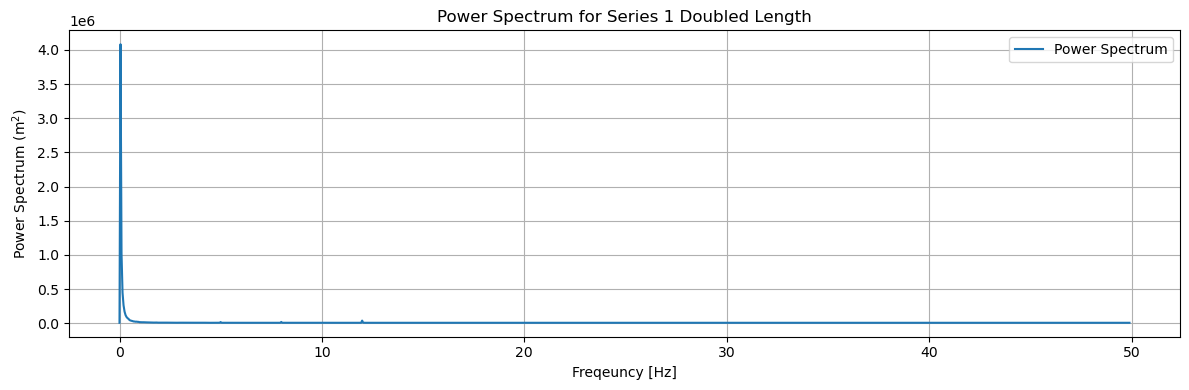

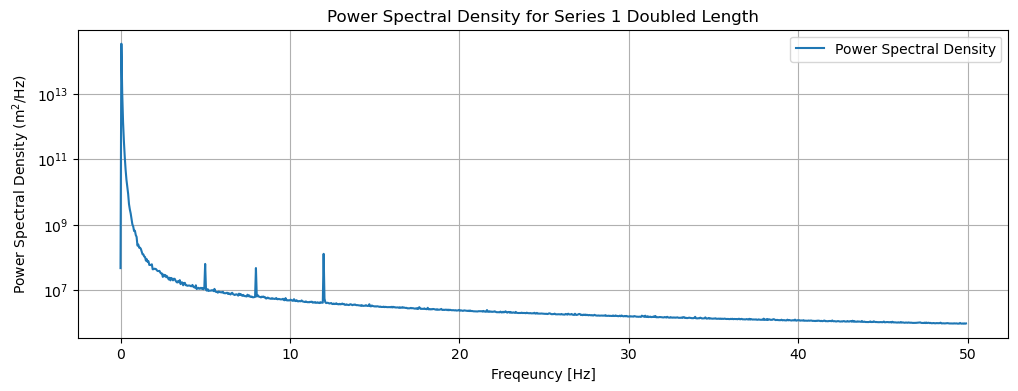

In [7]:
SeriesTransforms(series1, n_points, 0, 1000, 'Autocovariance for Series 1', 'Power Spectrum for Series 1', 'Power Spectral Density for Series 1')
SeriesTransforms(series1_doubled, n_points_doubled, 0, 2000, 'Autocovariance for Series 1 Doubled Length', 'Power Spectrum for Series 1 Doubled Length', 'Power Spectral Density for Series 1 Doubled Length')

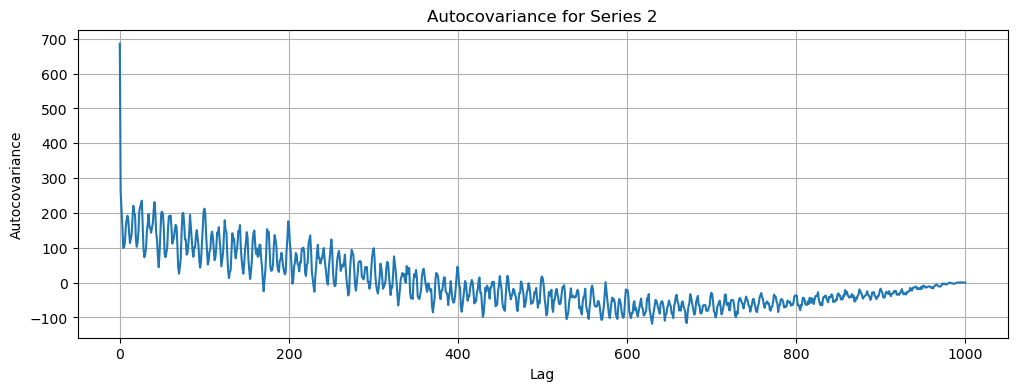

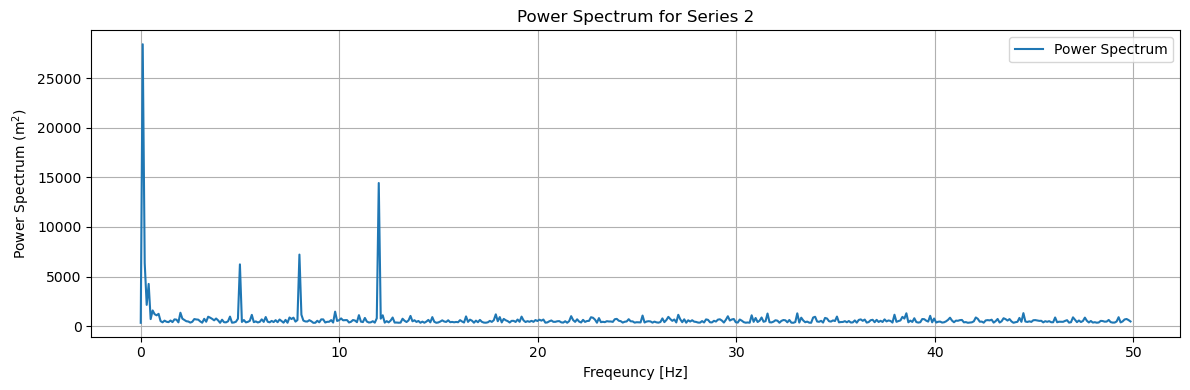

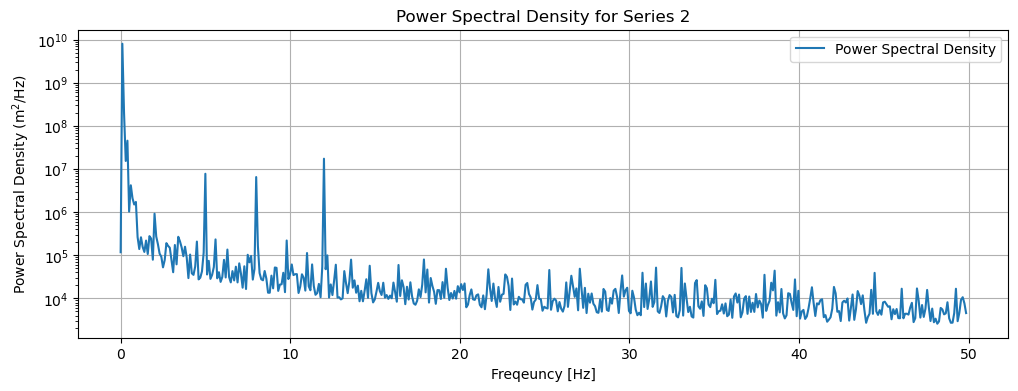

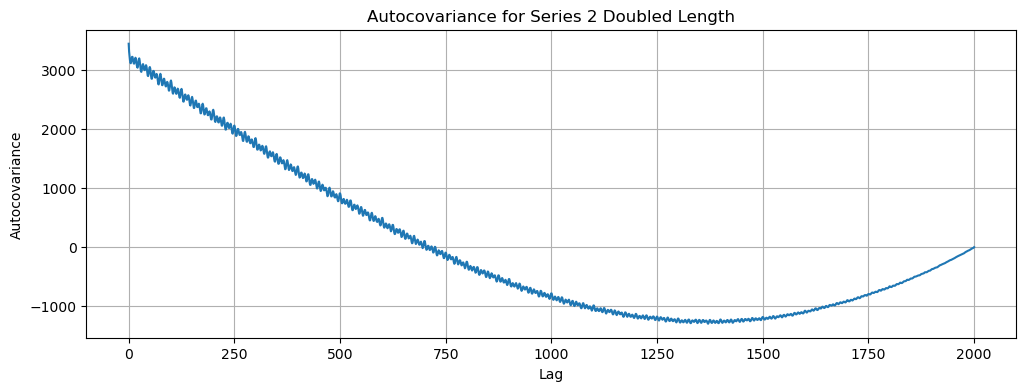

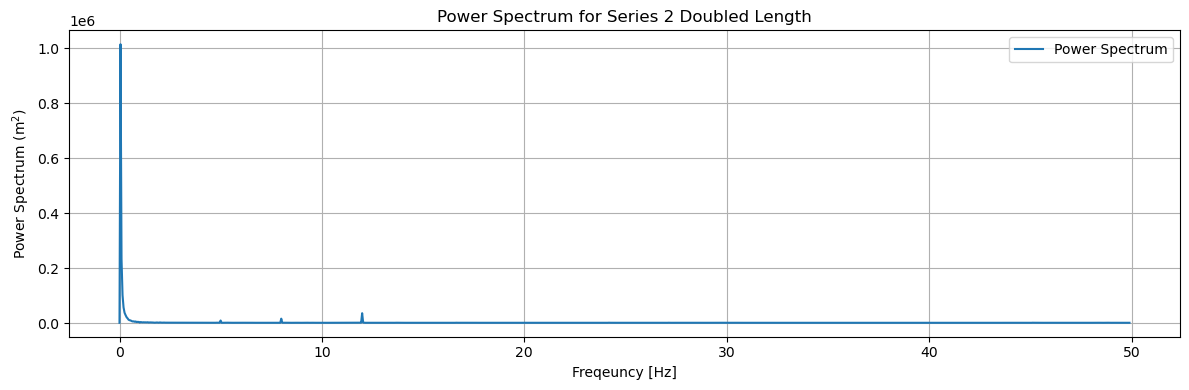

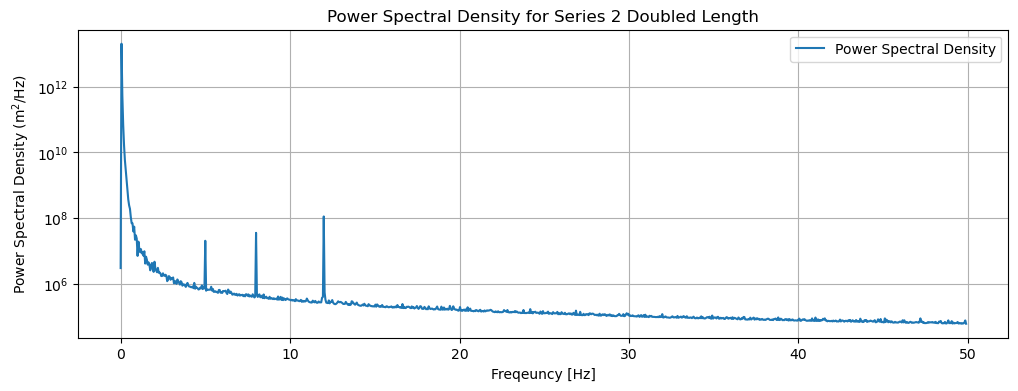

In [8]:
SeriesTransforms(series2, n_points, 0, 1000, 'Autocovariance for Series 2', 'Power Spectrum for Series 2', 'Power Spectral Density for Series 2')
SeriesTransforms(series2_doubled, n_points_doubled, 0, 2000, 'Autocovariance for Series 2 Doubled Length', 'Power Spectrum for Series 2 Doubled Length', 'Power Spectral Density for Series 2 Doubled Length')

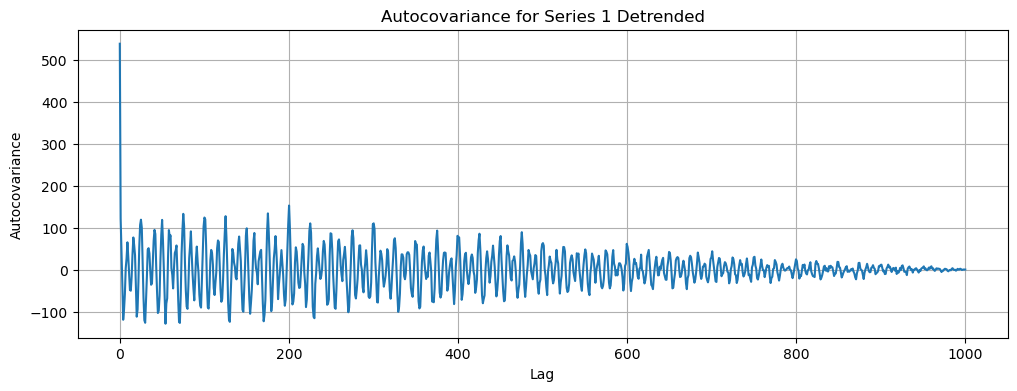

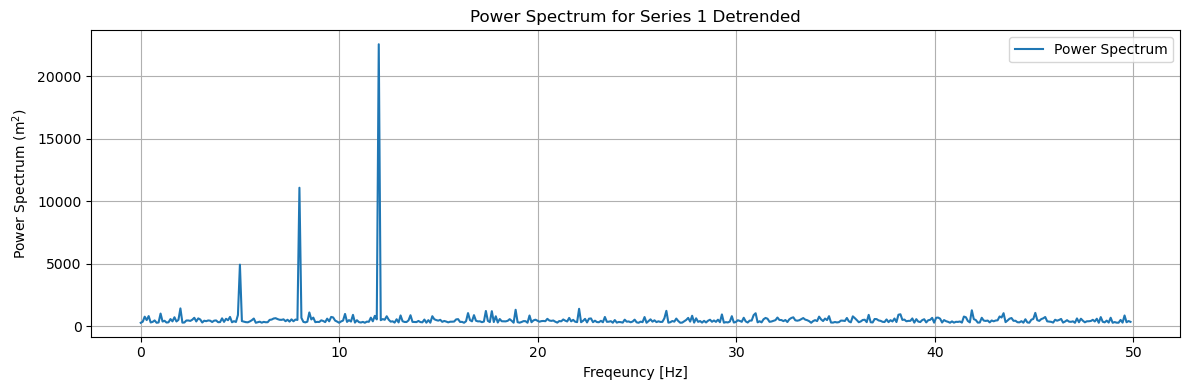

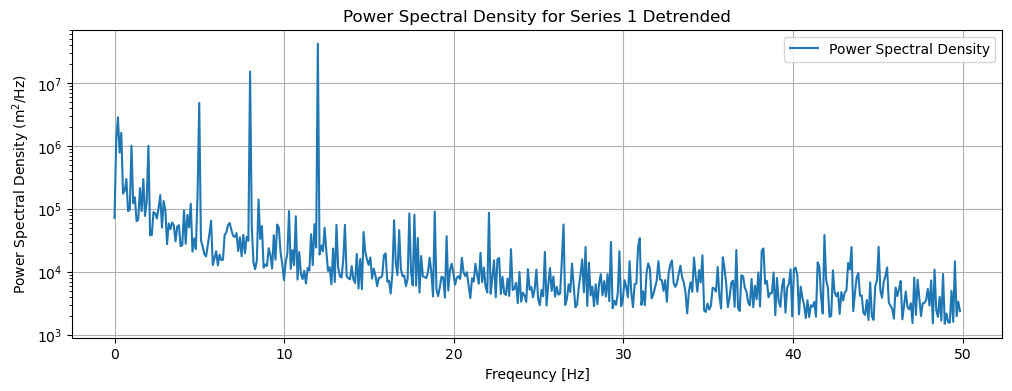

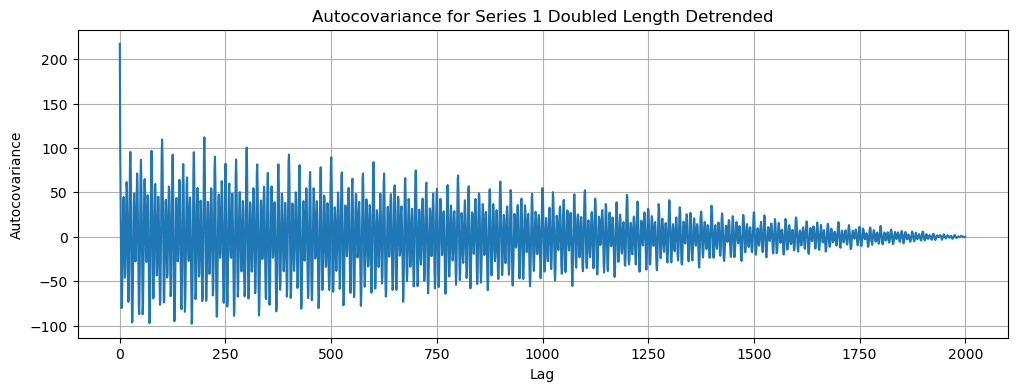

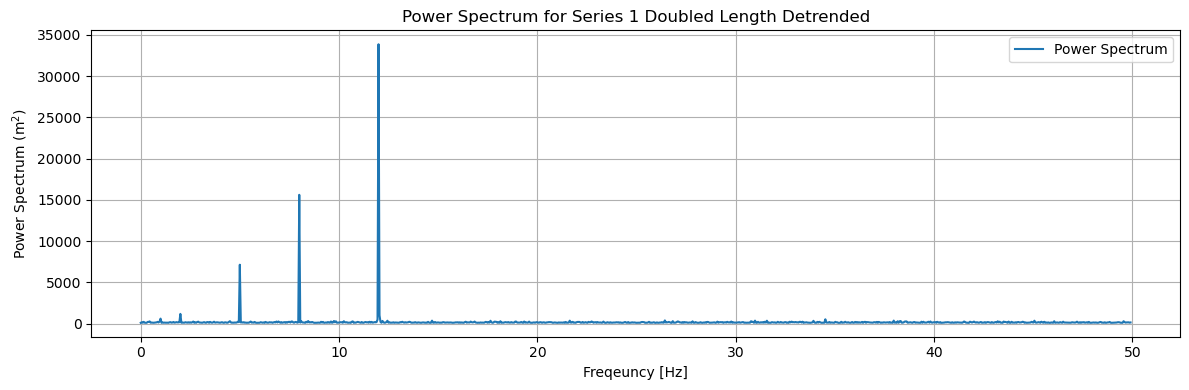

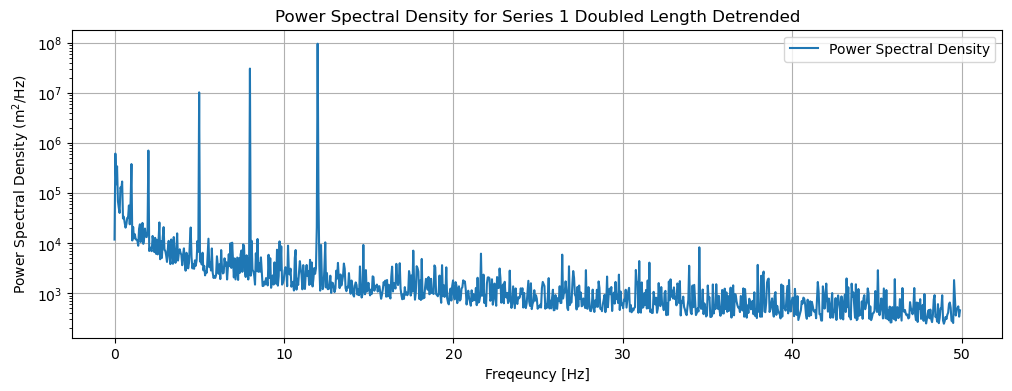

In [9]:
SeriesTransforms(series1_detrended, n_points, 0, 1000, 'Autocovariance for Series 1 Detrended', 'Power Spectrum for Series 1 Detrended', 'Power Spectral Density for Series 1 Detrended')
SeriesTransforms(series1_doubled_detrended, n_points_doubled, 0, 2000, 'Autocovariance for Series 1 Doubled Length Detrended', 'Power Spectrum for Series 1 Doubled Length Detrended', 'Power Spectral Density for Series 1 Doubled Length Detrended')

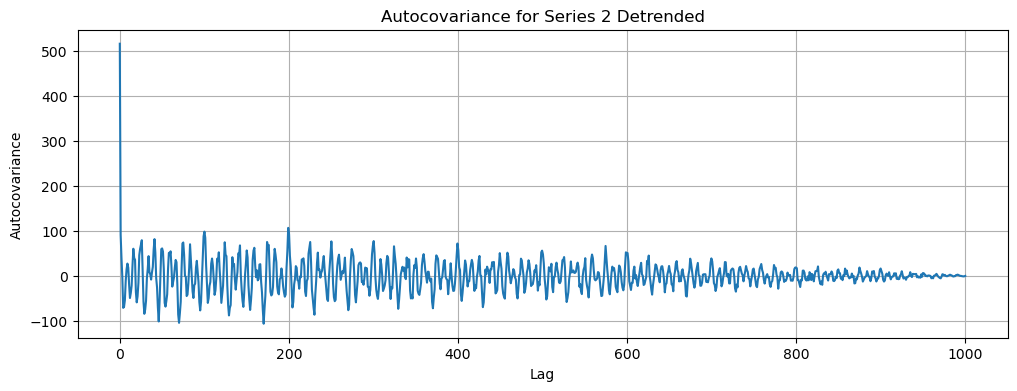

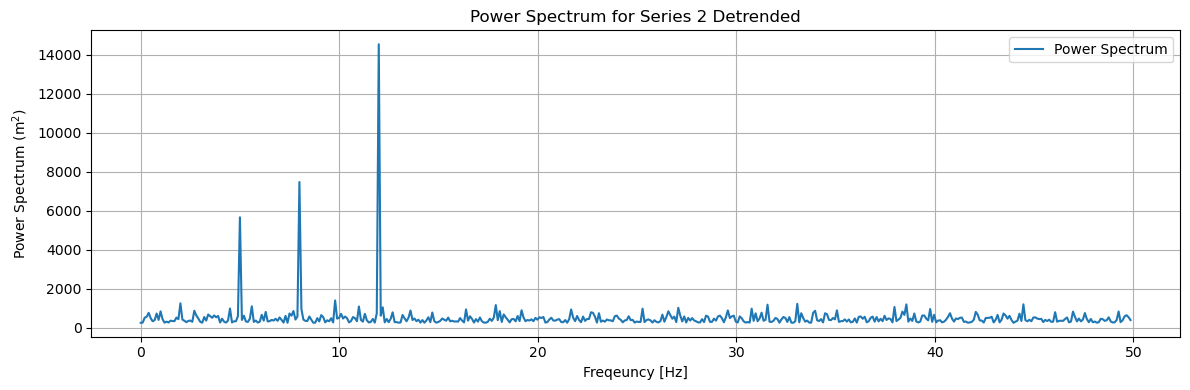

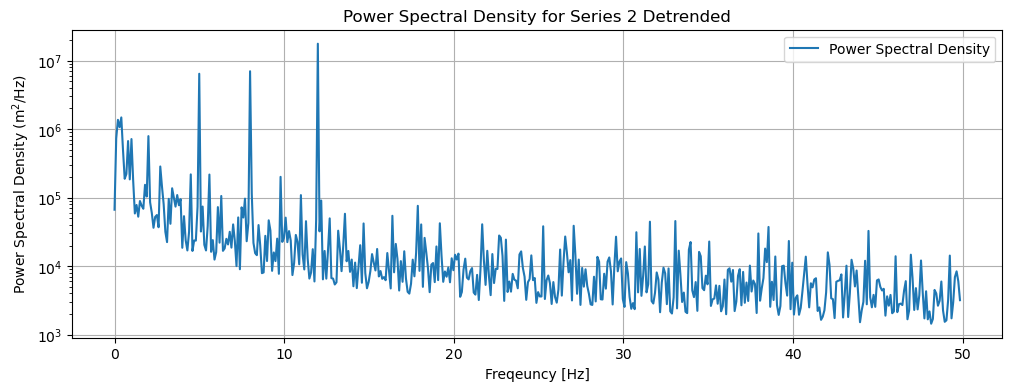

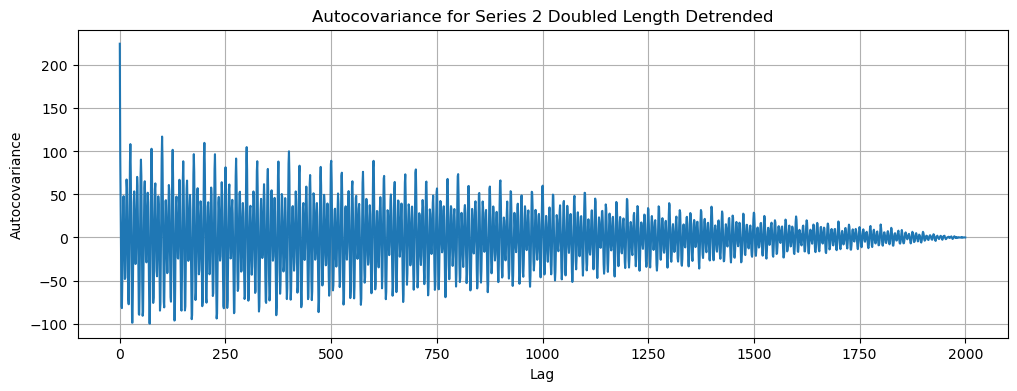

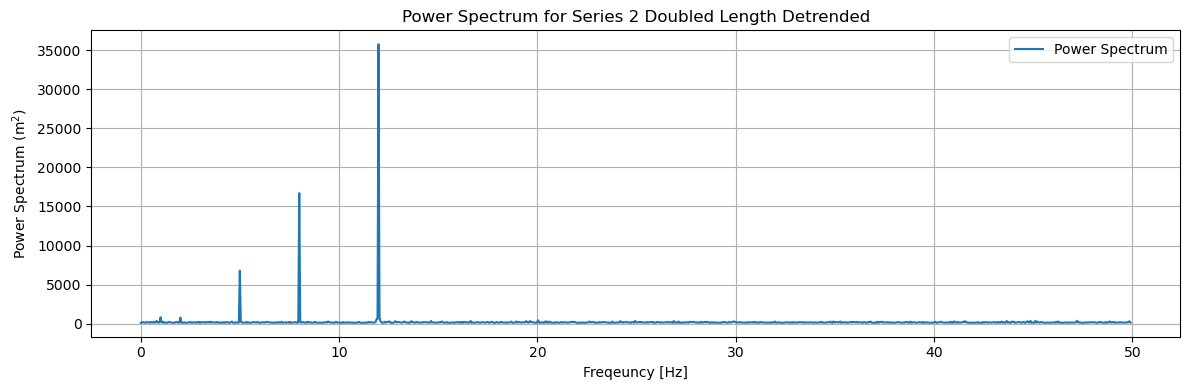

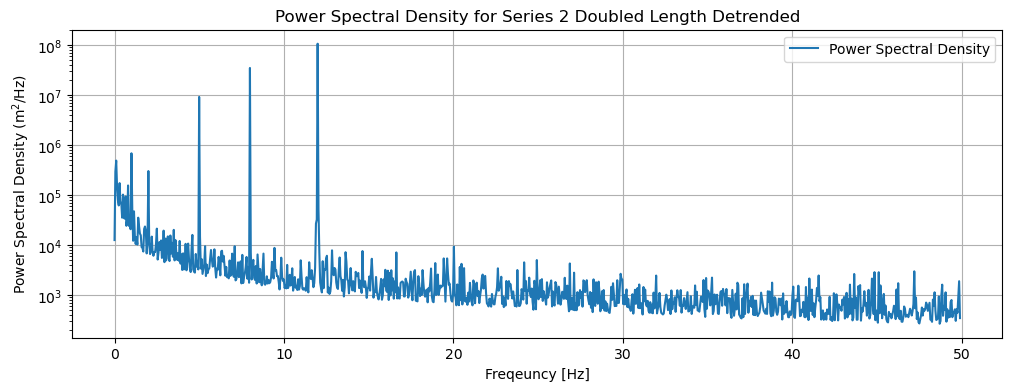

In [10]:
SeriesTransforms(series2_detrended,n_points, 0, 1000, 'Autocovariance for Series 2 Detrended', 'Power Spectrum for Series 2 Detrended', 'Power Spectral Density for Series 2 Detrended')
SeriesTransforms(series2_doubled_detrended, n_points_doubled, 0, 2000, 'Autocovariance for Series 2 Doubled Length Detrended', 'Power Spectrum for Series 2 Doubled Length Detrended', 'Power Spectral Density for Series 2 Doubled Length Detrended')

In [11]:
def SNR(series, noise, points, title):
    autocov_list = []
    lag = np.linspace(0, points, points)
    for i in lag:
        autocov_series = autocovariance(series, int(i))
        autocov_list.append(autocov_series)
    power_spectrum, fft_freqs, sampling_frequency = FourierTransform(autocov_list)
    power_spectrum = np.real(power_spectrum)
    psd = []
    for i in range(len(power_spectrum)):
        if fft_freqs[i] != 0:
            psd.append((np.abs(power_spectrum[i]) ** 2) / (fft_freqs[i]))
        else:
            # Handle the case when fft_freqs[i] is 0 (DC component)
            psd.append(np.abs(power_spectrum[i]) ** 2)

     
   # Select positive frequencies
    positive_freqs_mask = fft_freqs >= 0
    fft_freqs = fft_freqs[positive_freqs_mask]
    psd = np.array(psd)[positive_freqs_mask]
    power_spectrum = power_spectrum[positive_freqs_mask]
    
    #-- Visually determine bandwidth of unwanted noise

    unwanted_noise_indices = np.where(fft_freqs > 40)[0].tolist()
    unwanted_noise_frequencies = []
    unwanted_noise_amplitudes = []

    for i in unwanted_noise_indices:
        unwanted_noise_frequencies.append(fft_freqs[i])
    for i in unwanted_noise_indices:
        unwanted_noise_amplitudes.append(power_spectrum[i])

    #-- Calculate power of unwanted noise

    squared_power_unwanted_noise = [x**2 for x in unwanted_noise_amplitudes]
    power_unwanted_noise = np.mean(squared_power_unwanted_noise)

    #-- Plot SNR(f) [dB] by normalizing over power of unwanted noise

    SNR_dB = [10*np.log(x / power_unwanted_noise) for x in power_spectrum]
    print('The Variance of this PSD is: ', np.var(SNR_dB))
    # Plot the PSD in dB for positive frequencies
    plt.figure(figsize=(12, 4))
    plt.title(title)
    plt.plot(fft_freqs, SNR_dB, label='PSD (dB)')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD (dB/Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    return 

The Variance of this PSD is:  18.049030275626563


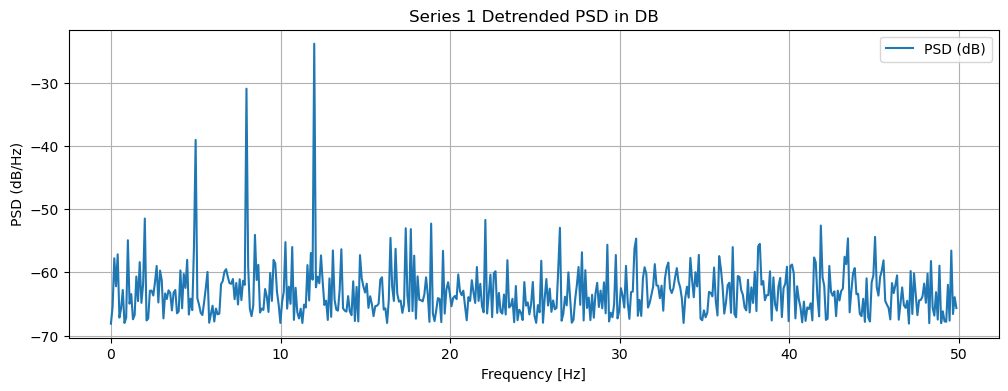

The Variance of this PSD is:  14.64529022235015


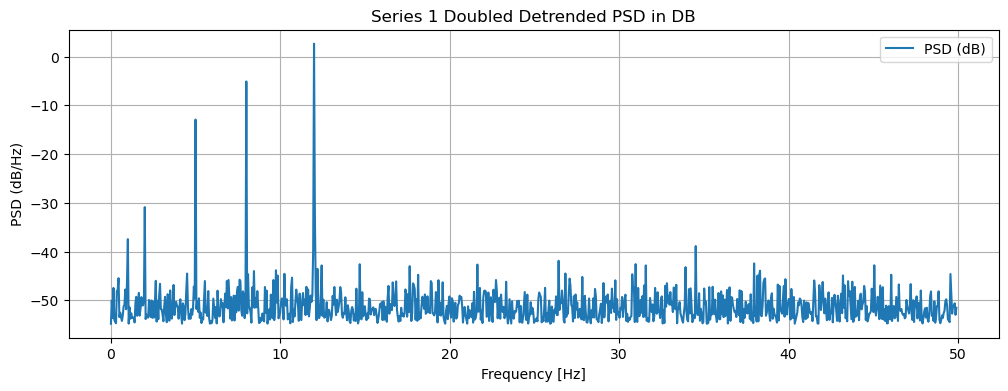

In [12]:
SNR(series1_detrended, noise, n_points, 'Series 1 Detrended PSD in DB')
SNR(series1_doubled_detrended, noise_doubled, 2*n_points, 'Series 1 Doubled Detrended PSD in DB')

The Variance of this PSD is:  20.42853023008033


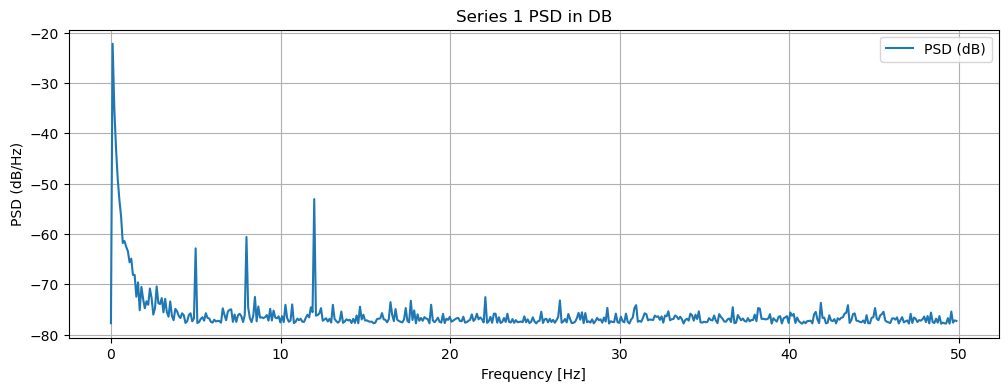

The Variance of this PSD is:  16.098782089932726


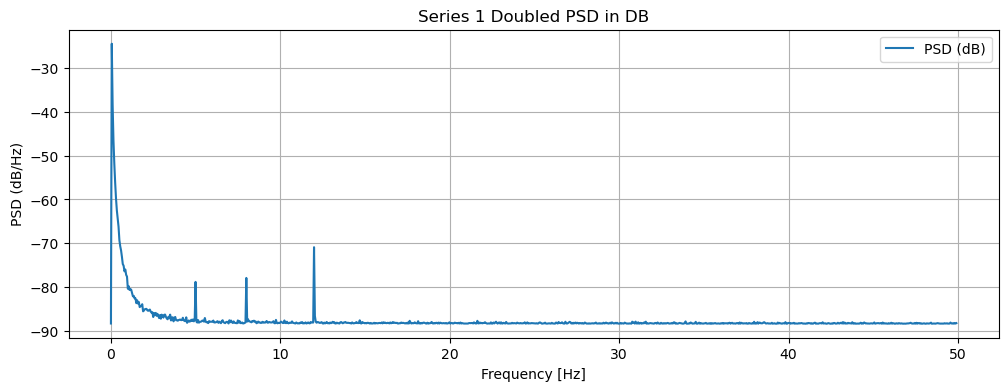

In [13]:
SNR(series1, noise, n_points, 'Series 1 PSD in DB')
SNR(series1_doubled, noise_doubled, 2*n_points, 'Series 1 Doubled PSD in DB')

The Variance of this PSD is:  18.65277362573827


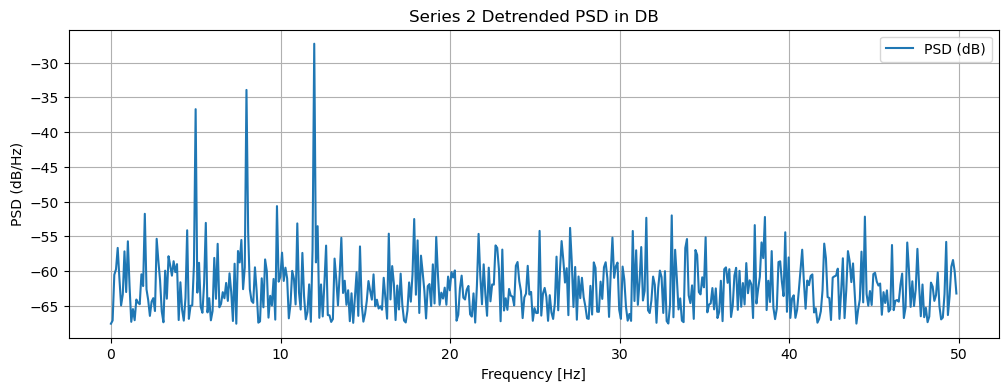

The Variance of this PSD is:  14.043677648282017


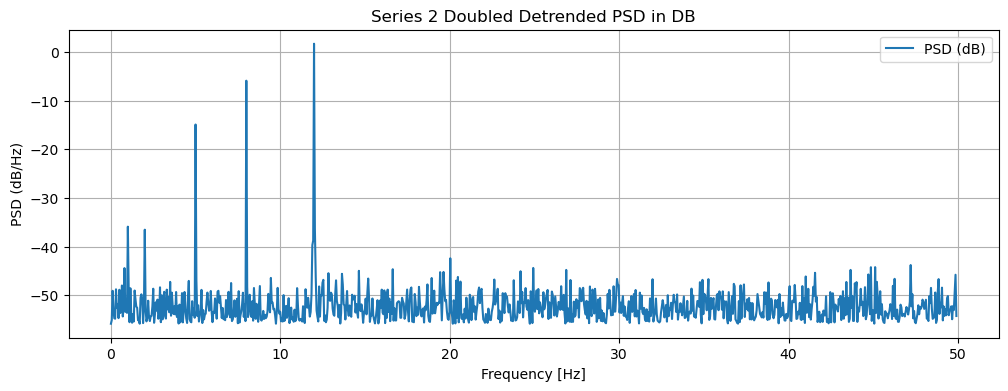

In [14]:
SNR(series2_detrended, noise, n_points, 'Series 2 Detrended PSD in DB')
SNR(series2_doubled_detrended, noise_doubled, 2*n_points, 'Series 2 Doubled Detrended PSD in DB')

The Variance of this PSD is:  20.35227765298906


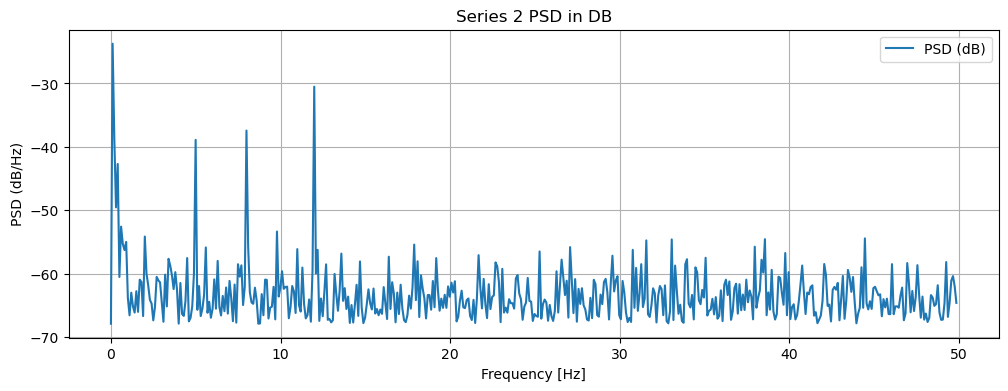

The Variance of this PSD is:  16.384974853195178


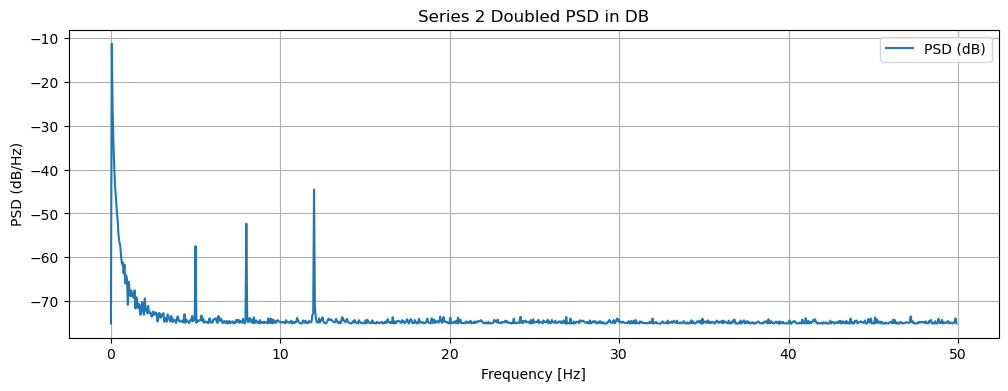

In [15]:
SNR(series2, noise, n_points, 'Series 2 PSD in DB')
SNR(series2_doubled, noise_doubled, 2*n_points, 'Series 2 Doubled PSD in DB')

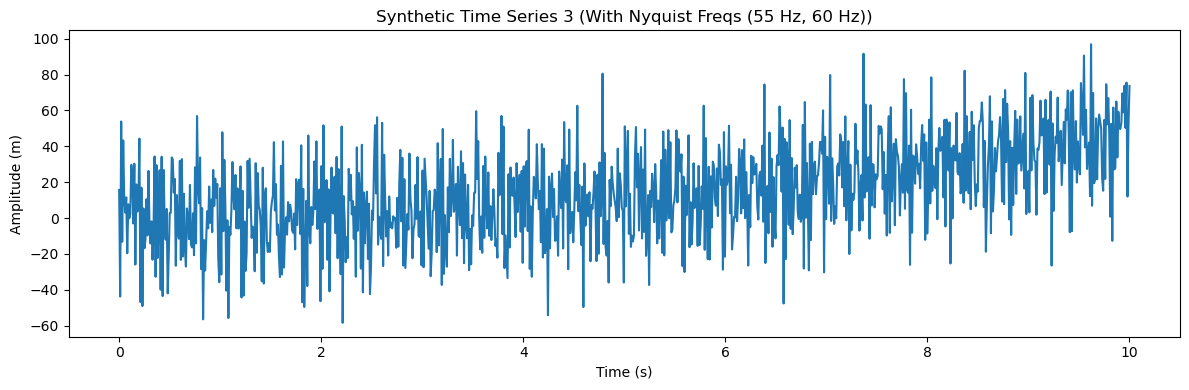

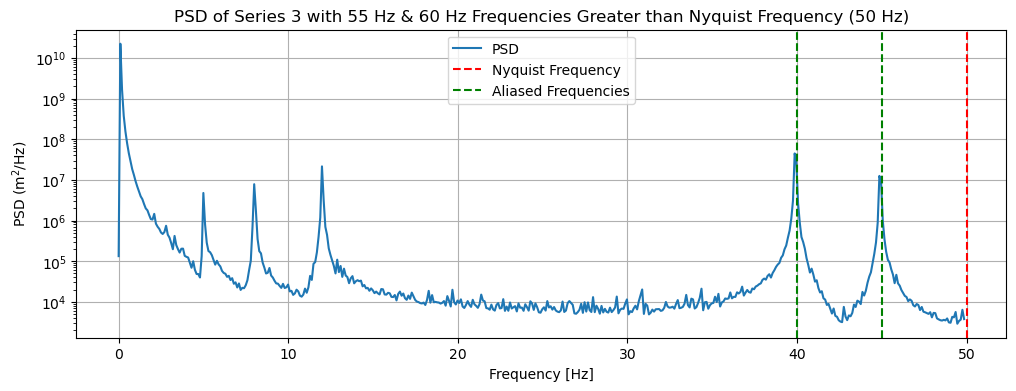

The Nyquist Frequency is:  50.0  Hz
The First Aliased Frequency is:  45.0  Hz
The Second Aliased Frequency is:  40.0  Hz


In [19]:
# Finding the Nyquist frequency for Series 2
sampling_interval = (t[-1] - t[0]) / n_points
nyquist_freq = 1/(2*sampling_interval)

# Making a Time Series with 2 Sinusoids with freq > Nyquist_freq

# Generate the second synthetic time series with similar characteristics
num_sin2 = 7  # Number of sinusoids
series3 = np.zeros(n_points)
sinusoids3 = []
frequencies2 = [1, 2, 5, 8, 12, 55, 60]  # Specific frequencies
amplitudes2 = [1, 2.5, 5.7, 8.6, 12.5, 15, 20]
phases2 = [np.pi/4, np.pi/2, np.pi, 0, -np.pi/3, np.pi/6, np.pi/8]
for i in range(num_sin2):
    freq = frequencies2[i]  # Use the specific frequencies
    amplitude = amplitudes2[i] #amplitude = np.random.uniform(1, 10)  # Amplitude
    phase = phases2[i]  # Phase
    sinusoid = amplitude * np.sin(2 * np.pi * freq * t + phase)
    sinusoids3.append(sinusoid)
    series3 += sinusoid

# Add quadratic trend
quadratic_trend = 0.5 * t**2 - 0.5 * t + 0.3
series3 += quadratic_trend

# Add random noise
noise2 = np.random.normal(0, noise_level, n_points)
series3 += noise2

plt.figure(figsize=(12, 4))
plt.plot()
plt.title('Synthetic Time Series 3 (With Nyquist Freqs (55 Hz, 60 Hz))')
plt.plot(t, series3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

plt.tight_layout()
plt.show()

autocov_list = []
lag = np.linspace(0, 1000, 1000)
for i in lag:
    autocov_series = autocovariance(series3, int(i))
    autocov_list.append(autocov_series)
power_spectrum, fft_freqs, sampling_frequency = FourierTransform(autocov_list)
psd = []
for i in range(len(power_spectrum)):
    if fft_freqs[i] != 0:
        psd.append((np.abs(power_spectrum[i])**2) / (fft_freqs[i]))
    else:
        # Handle the case when fft_freqs[i] is 0 (DC component)
        psd.append(np.abs(power_spectrum[i])**2)

#psd = np.abs(power_spectrum) / (n_points * sampling_frequency)

# Select positive frequencies
positive_freqs_mask = fft_freqs >= 0
fft_freqs = fft_freqs[positive_freqs_mask]
psd = np.array(psd)[positive_freqs_mask]
power_spectrum = power_spectrum[positive_freqs_mask]
aliased_frequency1 = np.abs(frequencies2[5] - 2*nyquist_freq * np.round(frequencies2[5] / (2 * nyquist_freq)))
aliased_frequency2 = np.abs(frequencies2[6] - 2*nyquist_freq * np.round(frequencies2[6] / (2 * nyquist_freq)))



plt.figure(figsize=(12, 4))
plt.title('PSD of Series 3 with 55 Hz & 60 Hz Frequencies Greater than Nyquist Frequency (50 Hz)')
plt.semilogy(fft_freqs, psd, label='PSD')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD (m$^2$/Hz)')
plt.grid(True)
plt.legend()
# Plot the aliased frequencies
plt.axvline(nyquist_freq, color='red', linestyle='--', label='Nyquist Frequency')
plt.axvline(aliased_frequency1, color='green', linestyle='--', label='Aliased Frequencies')
plt.axvline(aliased_frequency2, color='green', linestyle='--')
plt.legend()
plt.show()

print('The Nyquist Frequency is: ', nyquist_freq, ' Hz')
print('The First Aliased Frequency is: ', aliased_frequency1, ' Hz')
print('The Second Aliased Frequency is: ', aliased_frequency2, ' Hz')
